# continue with trajDiff kernel

In [838]:
from scipy.stats import pearsonr
from tqdm import tqdm
import seaborn as sns
import anndata as ad
import mudata as mu

In [483]:
merged_df=pd.read_csv("../processed_data/5.16_pagaheatmap_origdata.csv",index_col=0)

In [485]:
merged_df=merged_df.iloc[:, -4:]

In [490]:
merged_df["sample"]=merged_df.index

milo_mdata should be a MuData object with three slots: feature_key and 'pseudobulk' - please run milopy.count_nhoods(adata) first


KeyError: 'milo'

In [1154]:
mdata_test

MuData object with n_obs × n_vars = 65217 × 50
  3 modalities
    rna:	65217 x 50
      obs:	'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'leiden_clusters_level_3', 'leiden_clusters_level_4', 'leiden_clusters_level_5', 'leiden_clusters_level_6', 'leiden_clusters_level_7', 'K2', 'K7', 'K19', 'K36', 'K66', 'K112', 'K220', 'C2', 'C7', 'C19', 'C36', 'C49', 'C90', 'C137', 'C2_named', 'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named', 'C137_named', 'sample_coarse', 'lineage_string', 'dpt_pseudotime', 'start', 'palantir_pseudotime', 'palantir_entropy', 'palantir_norm', 'lineage_chondro', 'lineage_laFibro', 'lineage_lepr', 'lineage_mesenchyme', 'pred_dpt', 'light_pred', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      uns:	'C19_named_colors', 'C7_named_colors', 'DM_EigenValues', 'coarse_label_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'lineage_laFibro_colors', 'lineage_string_colors', 'mix_level_2_colors', 'mix_level_2_sizes', 'neighbors', 'paga', 'palantir_waypoints', 'sample_coarse_sizes', 'umap', 'nhood_neighbors_key'
      obsm:	'DM_EigenVectors', 'DM_EigenVectors_multiscaled', 'X_draw_graph_fa', 'X_pca', 'X_scANVI', 'X_umap', 'palantir_fate_probabilities', 'nhoods'
      layers:	'counts'
      obsp:	'DM_Kernel', 'DM_Similarity', 'connectivities', 'distances'
    milo:	0 x 0
    pseudobulk:	12960 x 50
      obs:	'Sample', 'Stage', 'light_pred', 'Tissue.Specific.', 'nhoods_index'
      uns:	'sample_col', 'group_col', 'time_col'
      varm:	'PValue', 'logFC', 'logCPM', 'FDR', 'F'

In [493]:
merged_df=pd.melt(merged_df, var_name='variable', value_name='value',id_vars="sample")

In [494]:
merged_df

,sample,variable,value
0,Ablation_Matsushita_abl14,Chondrocyte,1.0
1,Ablation_Matsushita_abl7con1,Chondrocyte,0.0
2,Ablation_Matsushita_abl7con2,Chondrocyte,0.0
3,Ablation_Matsushita_cxcl1,Chondrocyte,0.0
4,Ablation_Matsushita_cxcl2,Chondrocyte,0.0
...,...,...,...
319,lambdoid_Holmes_P10,Fibroblast,0.0
320,lambdoid_Holmes_P28,Fibroblast,0.0
321,sagittal_Holmes_E18,Fibroblast,0.0
322,sagittal_Holmes_P10,Fibroblast,0.0


In [495]:
merged_df.index=merged_df["sample"]+"_sep_"+merged_df["variable"]

In [499]:
merged_df=merged_df.loc[merged_df["value"]>0.05]

In [503]:
lineageIndex=merged_df.index

In [510]:
merged_df=merged_df[["sample","variable"]]

In [512]:
merged_df.columns=["Sample","Lineage"]

In [656]:
set(merged_df["Lineage"])

{'Chondrocyte', 'Diaphyseal MSC', 'Fibroblast', 'Mesenchyme'}

In [514]:
sampleDict = dict(zip(dpt.obs['Sample'], dpt.obs.index))


In [519]:
dpt.obs["Cell"]=dpt.obs.index

In [527]:
result_df = dpt.obs.groupby('Sample')['Cell'].agg(list).reset_index()
sample_dict = dict(zip(result_df['Sample'], result_df['Cell']))

In [604]:
lineageDict={"Chondro":dpt.obs.index[dpt.obs["lineage_chondro"]],
            "Lepr_BMSC":dpt.obs.index[dpt.obs["lineage_lepr"]],
            "Fibroblast":dpt.obs.index[dpt.obs["lineage_laFibro"]],
            "Mesenchyme":dpt.obs.index[dpt.obs["lineage_mesenchyme"]]}

In [545]:
test_list=list(set(sample_dict["Suture2021_Farmer_E17"]) & set(lineageDict["Mesenchyme"]))

In [548]:
dpt[test_list]

View of AnnData object with n_obs × n_vars = 3600 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2

In [549]:
dptValue=dpt.obs["light_pred"]

In [563]:
dptValue=dpt.obs["light_pred"]
timeDict=pd.DataFrame(dptValue).iloc[:,0].to_dict()

In [584]:
timeBin=pd.DataFrame(timeDf["dpt_bin"]).iloc[:,0].to_dict()

<AxesSubplot: ylabel='Count'>

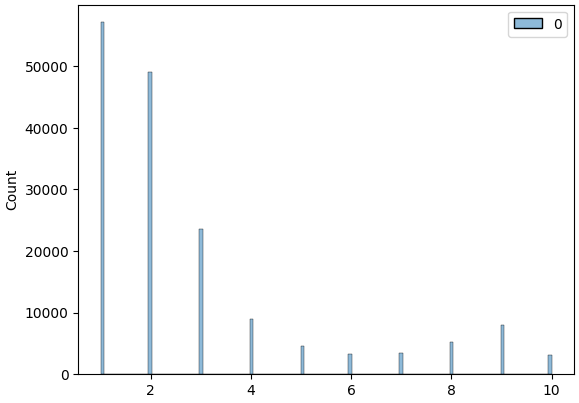

In [822]:
sns.histplot(timeBin.values())

In [640]:
pd.DataFrame.from_dict(timeBin,orient="index")


,0
Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0,2
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0,5
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0,7
Suture2021_Farmer_E17_AAAGATGAGGGAACGG-1_1-0,3
Suture2021_Farmer_E17_AAAGTAGTCGGAGCAA-1_1-0,3
...,...
TTTGACTGTATTTCCT-1_5-1-2,3
TTTGACTGTTGCATTG-1_5-1-2,3
TTTGACTTCTTGGGCG-1_5-1-2,8
TTTGGAGCAGCGACAA-1_5-1-2,9


In [566]:
subsetAdata=dpt[test_list]

In [570]:
geneMatrix=subsetAdata.X.toarray()

In [574]:
geneMatrix.shape[0]

3600

In [576]:
subsetAdata.var_names

Index(['0610007N19Rik', '0610007P14Rik', '0610009B22Rik', '0610009D07Rik',
       '0610009E02Rik', '0610009L18Rik', '0610009O20Rik', '0610010F05Rik',
       '0610010K14Rik', '0610011F06Rik',
       ...
       'mt-Tq', 'mt-Ts2', 'mt-Tt', 'mt-Tv', 'mt-Tw', 'mt-Ty', 'tdT-WPRE-trans',
       'tdTomato-WPRE-trans', 'tdtomato', 'tomato'],
      dtype='object', length=17312)

In [577]:
varName = subsetAdata.var_names

In [605]:
for i in lineageDict.keys():
    print([i+"seq"])

['Chondroseq']
['Lepr_BMSCseq']
['Fibroblastseq']
['Mesenchymeseq']


In [609]:
np.array(subsetCell)

array(['Ablation_Matsushita_abl7con1_CCTCTGAAGTAACCCT-1_2-0-2',
       'Ablation_Matsushita_abl7con1_CGTCAGGCACCATGTA-1_2-0-2',
       'Ablation_Matsushita_abl7con1_GATCGCGTCCGTCATC-1_2-0-2', ...,
       'Ablation_Matsushita_abl7con1_CGAGCACCAGCTCGCA-1_2-0-2',
       'Ablation_Matsushita_abl7con1_CTCGGAGGTGATAAAC-1_2-0-2',
       'Ablation_Matsushita_abl7con1_GCAATCAAGTCCGGTC-1_2-0-2'],
      dtype='<U53')

In [612]:
mapped_list = list(map(lambda val: timeDict[val], subsetCell))

In [615]:
geneMat

,0
0,"(0, 32)\t1.440719\n (0, 49)\t1.440719\n (0..."
1,"(0, 2)\t1.0547333\n (0, 10)\t1.0547333\n (..."
2,"(0, 1)\t0.87214464\n (0, 10)\t0.87214464\n ..."
3,"(0, 22)\t1.9904357\n (0, 26)\t1.9904357\n ..."
4,"(0, 14)\t1.5180229\n (0, 29)\t1.5180229\n ..."
...,...
1307,"(0, 5)\t0.9825577\n (0, 8)\t0.9825577\n (0..."
1308,"(0, 1)\t1.0154854\n (0, 22)\t1.0154854\n (..."
1309,"(0, 1)\t1.134786\n (0, 26)\t1.134786\n (0,..."
1310,"(0, 14)\t1.4126673\n (0, 29)\t1.4126673\n ..."


In [641]:
cell_threshold=40
pearsonAllDict={}
for i in sample_dict.keys():
    print(i)
    for j in lineageDict.keys():
        subsetCell = list(set(sample_dict[i]) & set(lineageDict[j]))
        if len(subsetCell)<cell_threshold:
            continue
        subsetAdata = dpt[subsetCell]
        timeVal= list(map(lambda val: timeDict[val], subsetCell))
        timeBinVal =  list(map(lambda val: timeBin[val], subsetCell))
        geneMat = pd.DataFrame(subsetAdata.X.toarray())
        varName = subsetAdata.var_names
        pearsonCoorDict = {}
        for k in range(geneMat.shape[1]):
            geneArr=geneMat.iloc[:,k]
            pearson,pearsonP=pearsonr(geneArr, np.array(timeVal))
            geneName=varName[k]
            pearsonCoorDict[geneName]=pearson
        pearsonCoorDf=pd.DataFrame.from_dict(pearsonCoorDict,orient="index")
        pearsonCoorDf=pearsonCoorDf.fillna(0)
        pearsonCoorDf.columns = [i + "_sep_" + j]
        pearsonAllDict[i + "_sep_" + j]=pearsonCoorDf

        
        
        

Ablation_Matsushita_abl7con1


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Ablation_Matsushita_abl7con2


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))

KeyboardInterrupt



In [692]:
np.array(subsetCell)

array(['Bmsc2019_Regev_b1_CCTTCCCTCTGTCAAG-1_1-0-2',
       'Bmsc2019_Regev_b1_GCGCAGTAGCGATTCT-1_1-0-2',
       'Bmsc2019_Regev_b1_CCTACACAGAGGTTGC-1_1-0-2', ...,
       'Bmsc2019_Regev_b1_CCAATCCTCGTGGTCG-1_1-0-2',
       'Bmsc2019_Regev_b1_CATTCGCAGTGGAGTC-1_1-0-2',
       'Bmsc2019_Regev_b1_AACTCAGAGGGTGTGT-1_1-0-2'], dtype='<U42')

In [701]:
geneDf["dpt_bin"]=np.array(timeBinVal)
gene_agg = geneDf.groupby("dpt_bin").agg(agg_dict)

ValueError: Length of values (1622) does not match length of index (1840)

In [778]:
from joblib import Parallel, delayed
from functools import partial

agg_dict = {gene: "mean" for gene in adata.var_names}

def process_subset(i, j, sample_dict, lineageDict, dpt, timeDict, timeBin, cell_threshold):
    subsetCell = list(set(sample_dict[i]) & set(lineageDict[j]))
    if len(subsetCell) < cell_threshold:
        return None
    
    subsetAdata = dpt[subsetCell]
    timeVal = list(map(lambda val: timeDict[val], subsetCell))
    timeBinVal = list(map(lambda val: timeBin[val], subsetCell))
    subsetAdata = dpt[subsetCell]
    geneMat = pd.DataFrame(subsetAdata.X.toarray())
    varName = subsetAdata.var_names
    geneMat.columns=subsetAdata.var_names
    geneMat.index=subsetAdata.obs_names
    geneMat["dpt_bin"]=np.array(timeBinVal)
    gene_agg = geneMat.groupby("dpt_bin").agg(agg_dict)
    bin_mask=geneMat.groupby("dpt_bin").size()<5
    gene_agg[bin_mask]=np.nan
    geneMat=geneMat.loc[:,varName]
    pearsonCoorDict = {}
    maxRowsDict={}
    sumValuesDict={}
    for k in range(geneMat.shape[1]):
        geneArr = geneMat.iloc[:, k]
        geneAggArr=gene_agg.iloc[:,k]
        if geneAggArr.sum()== 0:
            geneName = varName[k]
            maxRowsDict[geneName]=0
            sumValuesDict[geneName]=0
            pearsonCoorDict[geneName]=0
        else:
            pearson, _ = pearsonr(geneArr, np.array(timeVal))
            geneName = varName[k]
            pearsonCoorDict[geneName] = pearson
            max_row = geneAggArr.idxmax()
            maxRowsDict[geneName] = max_row
            sumValuesDict[geneName]=geneAggArr.sum()
    
    pearsonCoorDf = pd.DataFrame.from_dict(pearsonCoorDict, orient="index").fillna(0)
    pearsonCoorDf.columns = [i + "_sep_" + j]
    maxRowDf = pd.DataFrame.from_dict(maxRowsDict, orient="index").fillna(0)
    maxRowDf.columns = [i + "_sep_" + j]
    sumValDf = pd.DataFrame.from_dict(sumValuesDict, orient="index").fillna(0)
    sumValDf.columns = [i + "_sep_" + j]
        
    
    return pearsonCoorDf, maxRowDf, sumValDf

# Your original variables
cell_threshold = 40
pearsonAllDict = {}

# Create a partial function to simplify the parallel processing
partial_process_subset = partial(process_subset, sample_dict=sample_dict, lineageDict=lineageDict, dpt=dpt, timeDict=timeDict, timeBin=timeBin, cell_threshold=cell_threshold)

key_pairs= [(merged_df['Sample'][i], merged_df['Lineage'][i]) for i in range(merged_df.shape[0])]

# Use joblib to parallelize the outer loop
results = Parallel(n_jobs=-1)(delayed(partial_process_subset)(*key_pair) for key_pair in tqdm(key_pairs))

# Filter out None values (when len(subsetCell) < cell_threshold)
pearson_results = [result[0] for result in results if result is not None]
max_results = [result[1] for result in results if result is not None]
sum_results = [result[2] for result in results if result is not None]

# Combine the results into the final DataFrame
pearsonAllDf = pd.concat(pearson_results, axis=1)
maxAllDf = pd.concat(max_results, axis=1)
sumAllDf = pd.concat(sum_results, axis=1)

  0%|          | 0/130 [00:00<?, ?it/s]364360.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364361.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364363.09s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364364.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364365.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364366.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364368.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364369.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364371.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
364370.35s - pydevd: Sending message related to process being replaced timed-out after 5

In [791]:
pearsonAllDf = pd.concat(pearson_results, axis=1)

In [775]:
[result[0] for result in results if result is not None]

[                     Bmsc2019_Regev_b3_sep_Chondro
 0610007N19Rik                             0.000000
 0610007P14Rik                            -0.397097
 0610009B22Rik                            -0.203932
 0610009D07Rik                             0.000000
 0610009E02Rik                             0.000000
 ...                                            ...
 mt-Ty                                     0.000000
 tdT-WPRE-trans                            0.000000
 tdTomato-WPRE-trans                       0.000000
 tdtomato                                  0.000000
 tomato                                    0.000000
 
 [17312 rows x 1 columns],
                      BmscEndosteal_Ono_Fgfr3CE_sep_Chondro
 0610007N19Rik                                     0.000000
 0610007P14Rik                                     0.000000
 0610009B22Rik                                    -0.049589
 0610009D07Rik                                     0.000000
 0610009E02Rik                                 

In [742]:
gene_agg = geneMat.groupby("dpt_bin").agg(agg_dict)
bin_mask=geneMat.groupby("dpt_bin").size()<5
gene_agg[bin_mask]=np.nan
geneMat=geneMat.loc[:,varName]
pearsonCoorDict = {}
maxRowsDict={}
sumValuesDict={}

In [741]:
gene_agg[bin_mask]=np.nan

In [738]:
geneMat.groupby("dpt_bin").agg(agg_dict)

,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,...,mt-Tq,mt-Ts2,mt-Tt,mt-Tv,mt-Tw,mt-Ty,tdT-WPRE-trans,tdTomato-WPRE-trans,tdtomato,tomato
dpt_bin,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.291364,0.274846,0.0,0.0,0.043403,0.160610,0.117596,0.255891,0.259634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.253112,0.262145,0.0,0.0,0.066290,0.135386,0.078289,0.311862,0.211429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.359028,0.313026,0.0,0.0,0.056886,0.191769,0.103792,0.253274,0.202295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.308497,0.244444,0.0,0.0,0.079533,0.156038,0.058928,0.206305,0.280077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.616639,0.195883,0.0,0.0,0.082747,0.224795,0.098122,0.263314,0.316822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.291575,0.125686,0.0,0.0,0.000000,0.064454,0.154171,0.221949,0.136553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.078864,0.437720,0.0,0.0,0.000000,0.119287,0.000000,0.312426,0.415485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.177805,0.627107,0.0,0.0,0.000000,0.070192,0.000000,0.086239,0.512328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.591334,0.0,0.0,0.000000,0.000000,0.000000,0.591334,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [733]:
timeVal = list(map(lambda val: timeDict[val], subsetCell))
timeBinVal = list(map(lambda val: timeBin[val], subsetCell))
subsetAdata = dpt[subsetCell]
geneMat = pd.DataFrame(subsetAdata.X.toarray())
varName = subsetAdata.var_names
geneMat.columns=subsetAdata.var_names
geneMat.index=subsetAdata.obs_names
geneMat["dpt_bin"]=np.array(timeBinVal)

In [732]:
len(timeBinVal)

1622

In [676]:
merged_df["Lineage"][merged_df["Lineage"]=="Diaphyseal MSC"]="Lepr_BMSC"
merged_df["Lineage"][merged_df["Lineage"]=="Chondrocyte"]="Chondro"

/tmp/ipykernel_225436/1901946388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Lineage"][merged_df["Lineage"]=="Diaphyseal MSC"]="Lepr_BMSC"
/tmp/ipykernel_225436/1901946388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Lineage"][merged_df["Lineage"]=="Chondrocyte"]="Chondro"


In [661]:
merged_df['Sample']

,Sample,Lineage
Ablation_Matsushita_abl14_sep_Chondrocyte,Ablation_Matsushita_abl14,Chondrocyte
Bmsc2019_Regev_b1_sep_Chondrocyte,Bmsc2019_Regev_b1,Chondrocyte
Bmsc2019_Regev_b3_sep_Chondrocyte,Bmsc2019_Regev_b3,Chondrocyte
BmscEndosteal_Ono_Fgfr3CE_sep_Chondrocyte,BmscEndosteal_Ono_Fgfr3CE,Chondrocyte
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondrocyte,BmscEndosteal_Ono_Fgfr3CEp53cHet,Chondrocyte
...,...,...
Metaphysis_Yang_4_sep_Fibroblast,Metaphysis_Yang_4,Fibroblast
Metaphysis_Yang_sorted_sep_Fibroblast,Metaphysis_Yang_sorted,Fibroblast
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21,Fibroblast
Septoclasts_Kishor_Longbone2_sep_Fibroblast,Septoclasts_Kishor_Longbone2,Fibroblast


In [662]:
key_pairs = [(i, j) for i in merged_df['Sample'] for j in merged_df['Lineage']]

In [ ]:
for j in sample_col:
    dfLogic=adata.obs["Sample"]==j
    for i in  lineage_only_dict.keys():
        logic=dfLogic&lineage_only_dict[i]&non_osteo
        if(logic.sum()>40):
            colname=i+("_")+j
            print(i+("_")+j)
            df=geneMatrix.loc[logic.values,:]
            pseduo_tmp=adata.obs["dpt_norm"].values[logic.values]
            for k in correlationMatrix.index:
                gene_df=df.loc[:,k]
                corr_coef=mutual_info_regression(gene_df.to_frame(), pseduo_tmp, discrete_features=[False])
                correlationMatrix.loc[k,colname]=corr_coef

In [ ]:
def(adata, 
    sample_dict:dict, 
    lineage_dict:dict,
    timeDict:dict,
    timeBin:dict
    cell_threshold: int=40)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


<AxesSubplot: ylabel='Count'>

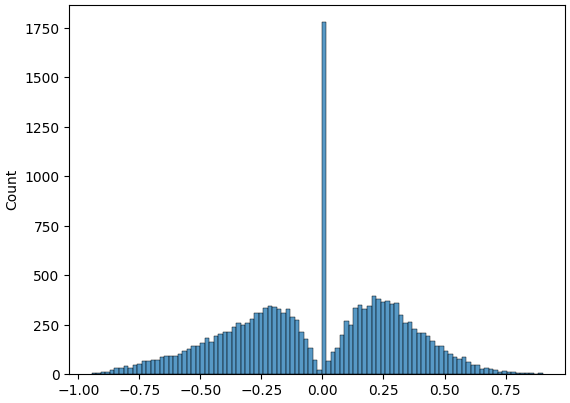

In [795]:
pearsonCoorDfBk=pearsonAllDf.copy()
pearsonAllDf = np.where(pearsonAllDf >= 0, np.sqrt(pearsonAllDf), -np.sqrt(-pearsonAllDf))

sns.histplot(data=pearsonAllDf[:,1], bins=100, kde=False)

In [828]:
pearsonAllDf

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63015637,  0.        , -0.29580246, ..., -0.25305642,
         0.        ,  0.        ],
       [-0.45158838, -0.22268529, -0.14616491, ...,  0.34901035,
        -0.20156987,  0.19875884],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.6736818 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

<AxesSubplot: xlabel='BmscEndosteal_Ono_Fgfr3CE_sep_Chondro', ylabel='Count'>

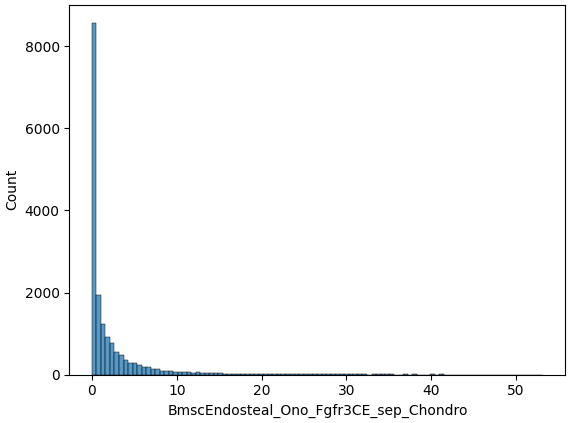

In [797]:
sns.histplot(data=sumAllDf.iloc[:,1], bins=100, kde=False)

<AxesSubplot: xlabel='BmscEndosteal_Ono_Fgfr3CE_sep_Chondro', ylabel='Count'>

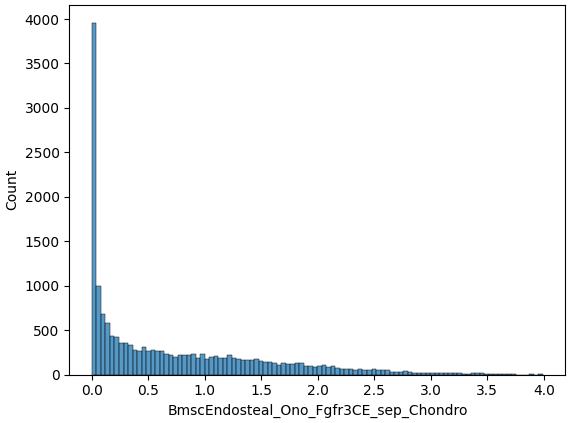

In [800]:
sumAllDf_bk=sumAllDf.copy()
sumAllDf_bk=np.log1p(sumAllDf_bk)
sns.histplot(data=sumAllDf_bk.iloc[:,1], bins=100, kde=False)

In [806]:
np.sum(sumAllDf_bk==0)

Bmsc2019_Regev_b3_sep_Chondro                                    7094
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                            1763
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                     3841
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                      2659
BmscEndosteal_Ono_Gas1CE_sep_Chondro                             4040
                                                                 ... 
Metaphysis_Yang_4_sep_Fibroblast                                 2233
Metaphysis_Yang_sorted_sep_Fibroblast                            2547
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast    3986
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      3449
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         1668
Length: 121, dtype: int64

In [827]:
sumAllDf_bk

,Bmsc2019_Regev_b3_sep_Chondro,BmscEndosteal_Ono_Fgfr3CE_sep_Chondro,BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro,BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro,BmscEndosteal_Ono_Gas1CE_sep_Chondro,BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro,BmscEndosteal_Ono_Prrx1creP21_sep_Chondro,BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro,BmscTime_Zhong_16M_sep_Chondro,BmscTime_Zhong_1M_sep_Chondro,...,BmscTime_Zhong_1.5M_sep_Fibroblast,BmscTime_Zhong_16M_sep_Fibroblast,BmscTime_Zhong_1M_sep_Fibroblast,BmscTime_Zhong_3M_sep_Fibroblast,Metaphysis_Yang_3_sep_Fibroblast,Metaphysis_Yang_4_sep_Fibroblast,Metaphysis_Yang_sorted_sep_Fibroblast,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast,Septoclasts_Kishor_Longbone2_sep_Fibroblast,Septoclasts_Kishor_Pdgfra_sep_Fibroblast
0610007N19Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610007P14Rik,0.683350,0.000000,1.040676,1.228130,1.178311,1.088758,1.720225,0.000000,0.000000,1.381518,...,1.381704,0.000000,1.459671,1.349173,1.483355,1.476326,1.553829,1.306856,0.000000,0.000000
0610009B22Rik,0.775236,1.288003,0.762305,0.981215,0.857416,1.001517,1.288532,0.037595,0.747869,0.818426,...,1.362591,0.962255,1.194887,1.212148,1.042715,0.998581,1.227584,1.009521,1.178371,1.479423
0610009D07Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009E02Rik,0.000000,0.247843,0.000000,0.000000,0.000000,0.000000,0.000000,0.119561,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097046,0.257511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Ty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tdT-WPRE-trans,0.000000,0.000000,3.216999,3.436041,2.447940,3.433257,3.253930,2.414078,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tdTomato-WPRE-trans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.193320,0.000000,0.000000
tdtomato,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [823]:
maxAllDf_bk=maxAllDf.copy()


<AxesSubplot: xlabel='BmscTime_Zhong_3M_sep_Chondro', ylabel='Count'>

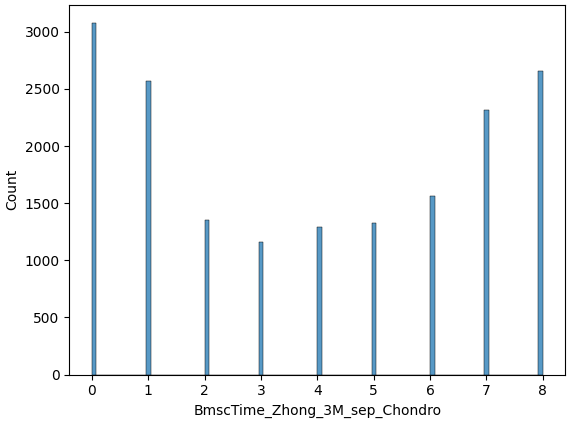

In [825]:

sns.histplot(data=maxAllDf_bk.iloc[:,10], bins=100, kde=False)

In [830]:
pearsonAllDf=pd.DataFrame(pearsonAllDf)
pearsonAllDf.index=pearsonCoorDfBk.index
pearsonAllDf.columns=pearsonCoorDfBk.columns

In [831]:
maxAllDf.to_csv("../processed_data/12.9_trajMap/12.9_maxDf.csv")
sumAllDf_bk.to_csv("../processed_data/12.9_trajMap/12.9_sumDf.csv")
pearsonAllDf.to_csv("../processed_data/12.9_trajMap/12.9_coorDf.csv")

In [835]:
adata_coor=ad.AnnData(pearsonAllDf.T)
adata_expr=ad.AnnData(sumAllDf_bk.T)
adata_peak=ad.AnnData(maxAllDf.T)

/tmp/ipykernel_225436/1112276499.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_coor=ad.AnnData(pearsonAllDf.T)
/tmp/ipykernel_225436/1112276499.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_expr=ad.AnnData(sumAllDf_bk.T)
/tmp/ipykernel_225436/1112276499.py:3: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_peak=ad.AnnData(maxAllDf.T)


In [839]:
mdata = mu.MuData({"coor": adata_coor, "expr": adata_expr,"peak":adata_peak})

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [843]:
sample=

AnnData object with n_obs × n_vars = 166204 × 17312
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'temp_cluster', 'batch', 'batch_atlas', 'size_factors', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'anno_level_1', 'anno_level_2', 'anno_level_3', 'anno_level_4', 'anno_level_5', 'mix_level_1', 'mix_level_2', 'merge_id_level3', 'merge_id_level4', 'merge_id_level5', 'cellid', 'leiden_clusters_level_1', 'leiden_clusters_level_2', 'le

In [854]:
aggdict={"Organ":"first",
        "Stage":"first",
        "Age":"first",
        'Tissue':"first", 'Tissue.Specific.':"first", 'Stage':"first", 
         'Gene.type':"first", 'Treatment':"first", 'Age.In.Detail.':"first", 'Machine':"first",
        'Origin':"first"}
sampleDf=dpt.obs.groupby("Sample").agg(aggdict)
# Convert the array to a pandas Series for easy manipulation
column_series = pd.Series(maxAllDf_bk.columns)

# Split the strings based on "_sep_" and create two separate arrays
split_arrays = column_series.str.split('_sep_', expand=True)

# Resulting arrays
sample = split_arrays[0].tolist()
lineage = split_arrays[1].tolist()
sampleDf=sampleDf.loc[sample]
sampleDf["Sample"]=sampleDf.index
sampleDf["Lineage"]=lineage

In [856]:
sampleDf.index=mdata.obs.index

In [1156]:
sampleDf.to_csv("../processed_data/12.12_TRAV/metadata.csv")

In [858]:
mdata.obs=sampleDf

In [1155]:
pearsonAllDf

,Bmsc2019_Regev_b3_sep_Chondro,BmscEndosteal_Ono_Fgfr3CE_sep_Chondro,BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro,BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro,BmscEndosteal_Ono_Gas1CE_sep_Chondro,BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro,BmscEndosteal_Ono_Prrx1creP21_sep_Chondro,BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro,BmscTime_Zhong_16M_sep_Chondro,BmscTime_Zhong_1M_sep_Chondro,...,BmscTime_Zhong_1.5M_sep_Fibroblast,BmscTime_Zhong_16M_sep_Fibroblast,BmscTime_Zhong_1M_sep_Fibroblast,BmscTime_Zhong_3M_sep_Fibroblast,Metaphysis_Yang_3_sep_Fibroblast,Metaphysis_Yang_4_sep_Fibroblast,Metaphysis_Yang_sorted_sep_Fibroblast,PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast,Septoclasts_Kishor_Longbone2_sep_Fibroblast,Septoclasts_Kishor_Pdgfra_sep_Fibroblast
0610007N19Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610007P14Rik,-0.630156,0.000000,-0.295802,-0.405087,-0.815654,-0.420196,-0.681213,0.000000,0.000000,0.210824,...,-0.238992,0.000000,-0.293273,-0.154962,-0.307338,-0.383393,-0.527128,-0.253056,0.000000,0.000000
0610009B22Rik,-0.451588,-0.222685,-0.146165,-0.089502,-0.457936,-0.038240,-0.198058,-0.390796,-0.290545,-0.334723,...,0.229619,0.273606,0.186830,0.346297,0.172858,0.242371,0.242311,0.349010,-0.201570,0.198759
0610009D07Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009E02Rik,0.000000,-0.250953,0.000000,0.000000,0.000000,0.000000,0.000000,-0.444709,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.247735,0.274668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Ty,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tdT-WPRE-trans,0.000000,0.000000,-0.237114,0.202319,0.282549,0.182554,0.725767,0.484336,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tdTomato-WPRE-trans,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.673682,0.000000,0.000000
tdtomato,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [1359]:
mdata.write_h5mu("../../important_processed_data/12.7_trajMap_v1.h5mu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
